# Plotting Panda Data Frames with Date indexes
## Data is randomly generated

In [22]:
# importing libs
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime 
%matplotlib inline

In [2]:
#create a date range: every day between Jan 1 2016 and April 05 2020
dateRange= pd.date_range('2016-01-01', '2020-04-05')

#create simulated data for these dates
#use len() to work out how many data values you need (one per date in the dateRange)
numberGen= len(dateRange)

#create a time series, using the dateRange as the index
timeSeries = pd.Series(np.random.random(numberGen), index = dateRange)

print('Time series using date_range to create the index')

print(timeSeries['2016-01-01':'2016-01-30'])
print('\n')
print('Number of days from 2016-01-01 until today',len(dateRange))

Time series using date_range to create the index
2016-01-01    0.194629
2016-01-02    0.639765
2016-01-03    0.700503
2016-01-04    0.013126
2016-01-05    0.020990
2016-01-06    0.929883
2016-01-07    0.760757
2016-01-08    0.413010
2016-01-09    0.092998
2016-01-10    0.576208
2016-01-11    0.178468
2016-01-12    0.735429
2016-01-13    0.080298
2016-01-14    0.419294
2016-01-15    0.942822
2016-01-16    0.598142
2016-01-17    0.127269
2016-01-18    0.214766
2016-01-19    0.714360
2016-01-20    0.755847
2016-01-21    0.999553
2016-01-22    0.711506
2016-01-23    0.510848
2016-01-24    0.561264
2016-01-25    0.371885
2016-01-26    0.391775
2016-01-27    0.163587
2016-01-28    0.504863
2016-01-29    0.481375
2016-01-30    0.776051
Freq: D, dtype: float64


Number of days from 2016-01-01 until today 1557


In [3]:
df_accumulate = timeSeries.cumsum()

In [23]:
df_accumulate.head(30)

2016-01-01     0.194629
2016-01-02     0.834394
2016-01-03     1.534897
2016-01-04     1.548023
2016-01-05     1.569013
2016-01-06     2.498896
2016-01-07     3.259653
2016-01-08     3.672663
2016-01-09     3.765661
2016-01-10     4.341869
2016-01-11     4.520337
2016-01-12     5.255766
2016-01-13     5.336064
2016-01-14     5.755358
2016-01-15     6.698180
2016-01-16     7.296322
2016-01-17     7.423591
2016-01-18     7.638358
2016-01-19     8.352718
2016-01-20     9.108564
2016-01-21    10.108117
2016-01-22    10.819623
2016-01-23    11.330471
2016-01-24    11.891735
2016-01-25    12.263620
2016-01-26    12.655396
2016-01-27    12.818983
2016-01-28    13.323845
2016-01-29    13.805220
2016-01-30    14.581271
Freq: D, dtype: float64

In [21]:
set1 = df_accumulate['2016-01-01':'2016-01-20']
set2 = df_accumulate['2016-02-01':'2016-02-20']
set3 = df_accumulate['2016-03-01':'2016-03-30']
set4 = df_accumulate['2016-04-01':'2016-04-30']
set5 = df_accumulate['2016-05-01':'2016-05-30']
set6 = df_accumulate['2016-06-01':'2016-06-30']

In [7]:
df = pd.DataFrame({'set1':set1,'set2':set2,'set3':set3,'set4':set4,'set5':set5,'set6':set6,})

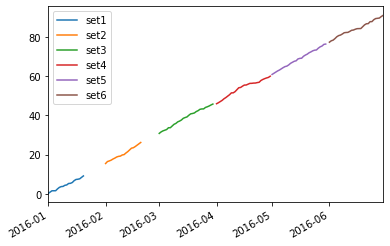

In [24]:
df.plot()

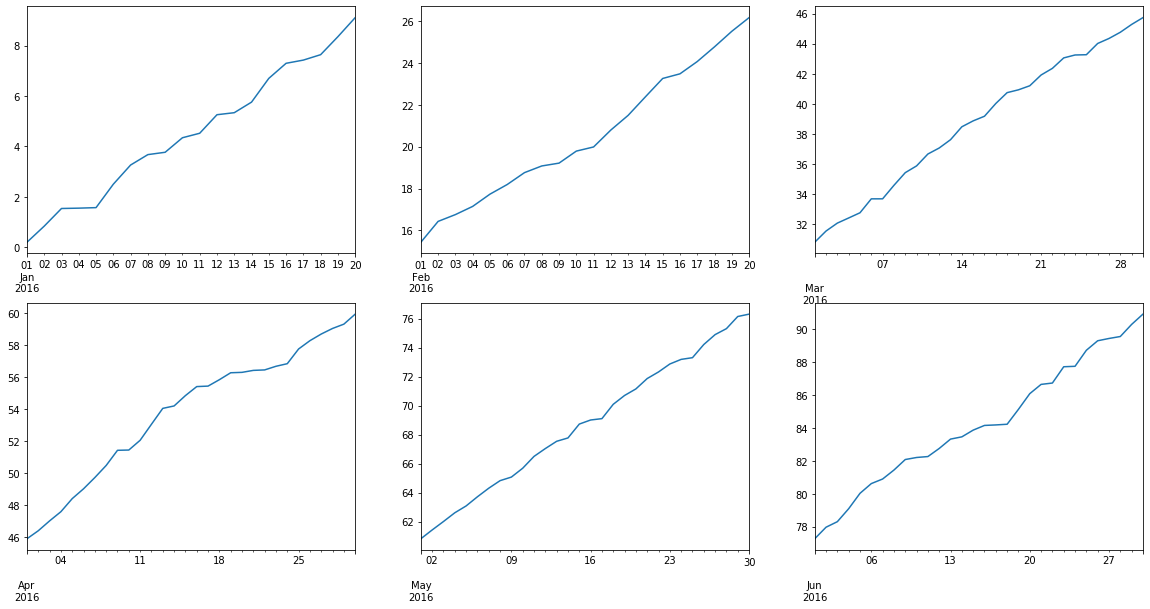

In [26]:
df_list = [set1, set2, set3, set4, set5, set6]

#define number of rows and columns for subplots
numberRow=2
numberCol=3
  
fig, plots = plt.subplots(numberRow, numberCol)
#Variable to counter to move in the list of the frames and display each of them  
counter=0 

# plot each row
for r in range(numberRow):
    # plot each column in this row
    for c in range(numberCol):
        
        # choose the dataframe for this row,column location and plot it
        # the ax attribute needs to be set to plots[row,column]
        # plots was returned from the call to plt.subplots (above)
        df_list[counter].plot(ax=plots[r,c],figsize=(20,10))
        
        # go to the next data frame
        counter= counter + 1

# Manipulating mental health data
## Data is aquired from a kaggle dataset
### source : https://www.kaggle.com/osmi/mental-health-in-tech-survey

In [27]:
# reading the data 
data = pd.read_csv("survey.csv", delimiter=',')

In [103]:
# checking the data
data.head(5)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [104]:
data.info()
# they are 1259 entries in this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

In [41]:
# gather all the indexs according the condition
Collect_Ages = data[(data.Age < 1) | (data.Age > 99)].index

In [42]:
# deleting the out of range ages. 
data_clean_age = data.drop(Collect_Ages)

In [105]:
data_clean_age.info()
# the number of entries did change. 
# the number of rows did change in some colums.
# thats due to the function drop deletes ENTIRE ROWS not select cell enteries.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1254 non-null object
Age                          1254 non-null int64
Gender                       1254 non-null object
Country                      1254 non-null object
state                        741 non-null object
self_employed                1236 non-null object
family_history               1254 non-null object
treatment                    1254 non-null object
work_interfere               991 non-null object
no_employees                 1254 non-null object
remote_work                  1254 non-null object
tech_company                 1254 non-null object
benefits                     1254 non-null object
care_options                 1254 non-null object
wellness_program             1254 non-null object
seek_help                    1254 non-null object
anonymity                    1254 non-null object
leave                        1254 non-null obj

# Plotting mental health data

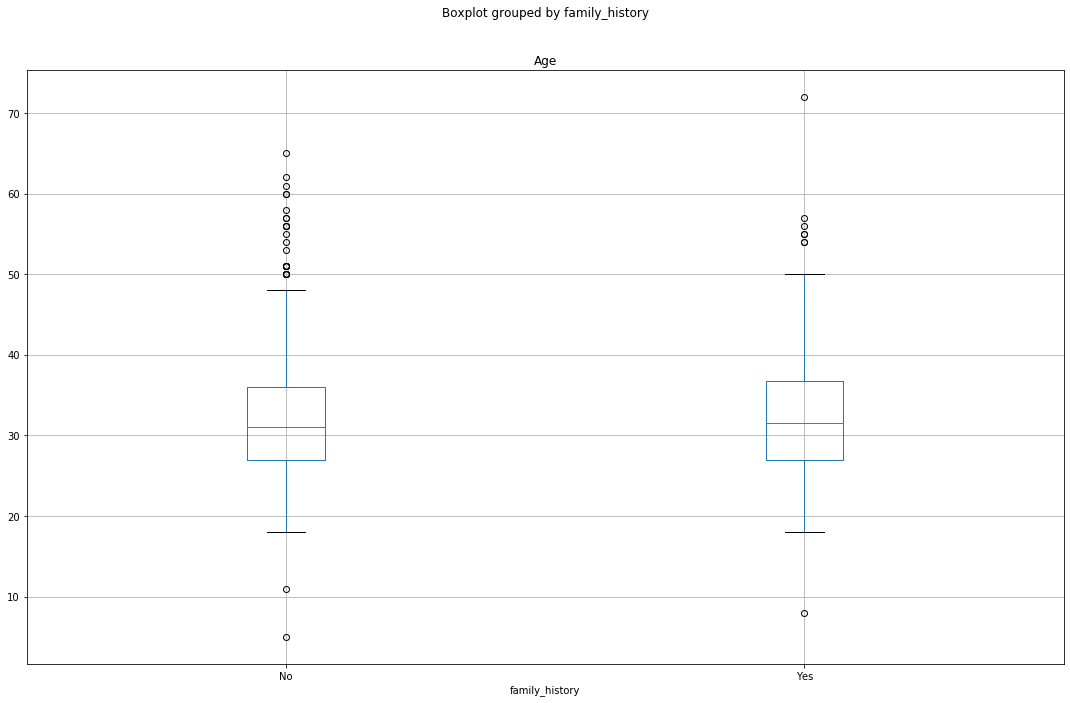

In [86]:
data_clean_age.boxplot(by ='family_history', column =['Age'], grid=True, figsize= (18,11)) 

# the median age for both with and without family history is around 30.

In [117]:
# grouping the data
wellness = data_clean_age.groupby('Country')['wellness_program'].apply(lambda x: x[x == 'No'].count())

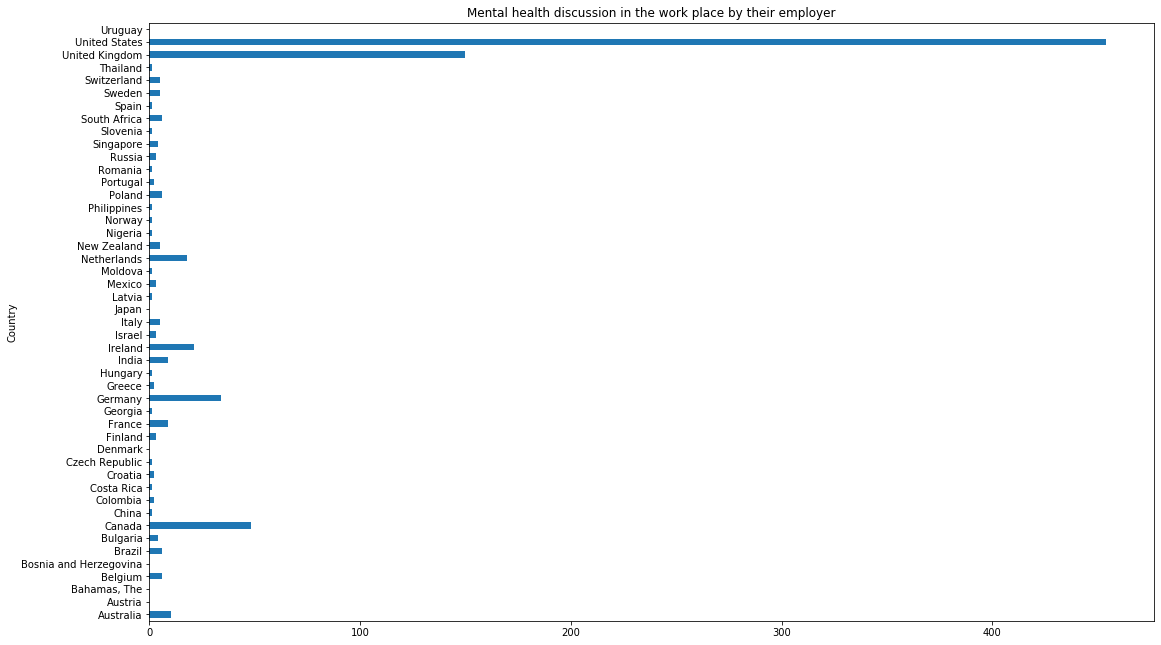

In [118]:
wellness.plot.barh(title = 'Mental health discussion in the work place by their employer', figsize=(18,11))
# US came first for mental health discussion secound to Uk and third to Canada

# Cleaning data

In [84]:
# replacing wrong entries for male in the gender column
data_clean_male= data_clean_age.replace(to_replace =["male", "M","m","Make","Man","Mail","Malr",
                                                              "msle","Mal","Maile","Male","Cis Male",
                                                               "Male(cis)","cis male","Cis Man"
                                                               ,"Guy (-ish) ^_^"],  
                            value ="Male") 

In [85]:
# replacing wrong entries for female in the gender column
data_clean_female= data_clean_male.replace(to_replace =["female","F","f","Female","Femake","woman",
                                                                  "femail","Woman","Cis Female",
                                                                  "cis-female/femme","Female (cis)"], 
                                           value ="Female")

In [108]:
# grouping the resposes according to treatment for males
male = data_clean_female.groupby('treatment')['Gender'].apply(lambda x: x[x == 'Male'].count())


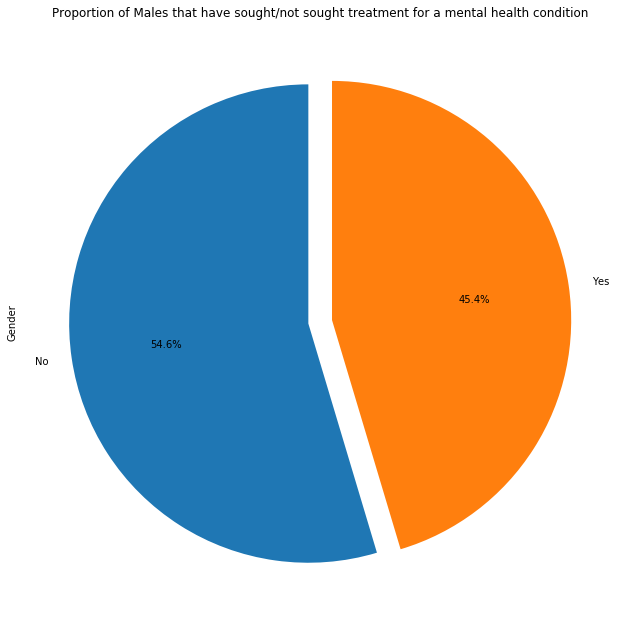

In [114]:
male.plot.pie(explode=[0.05,0.05],autopct='%1.1f%%', 
                                            figsize=(18,11), 
                                            title = 'Proportion of Males that have sought/not sought treatment for a mental health condition',
                                            startangle=90,
                                            labels=['No','Yes'])

In [112]:
# Grouping the resposes according to treatment for females.
female = data_clean_female.groupby('treatment')['Gender'].apply(lambda x: x[x == 'Female'].count())


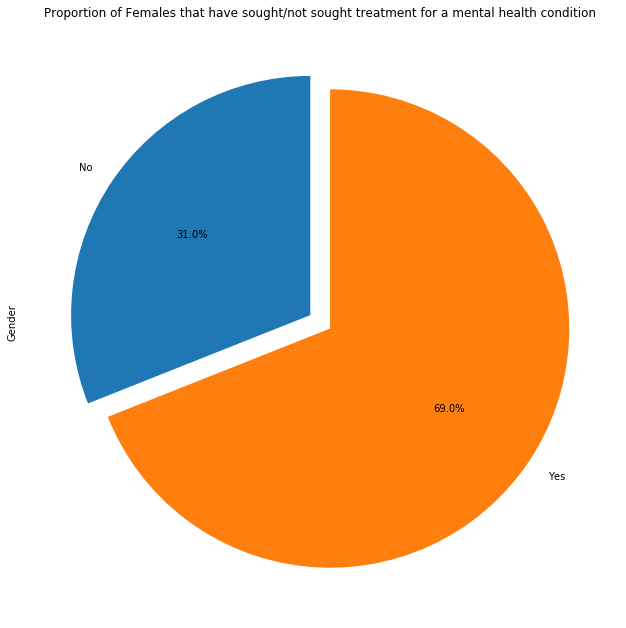

In [115]:
female.plot.pie(explode=[0.05,0.05],autopct='%1.1f%%', 
                                            figsize=(18,11), 
                                            title = 'Proportion of Females that have sought/not sought treatment for a mental health condition',
                                            startangle=90,
                                            labels=['No','Yes'])



## There are high proportion of males that didnt seek mental health treatment relative to females 